<a href="https://colab.research.google.com/github/diksha139/105StudentActivity/blob/main/Project128_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/procodingclass/Pro-M3-Hurricane-Damage-Dataset

Cloning into 'Pro-M3-Hurricane-Damage-Dataset'...
remote: Enumerating objects: 800, done.
remote: Total 800 (delta 0), reused 0 (delta 0), pack-reused 800
Receiving objects: 100% (800/800), 2.07 MiB | 19.45 MiB/s, done.


In [ ]:
#Training data
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img


# Random Data Augmentation(Rescale, Rotation, Flips, Zoom, Shifts) using ImageDataGenerator 
training_data_generator = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')


# Image Directory
training_image_directory = "/content/Pro-M3-Hurricane-Damage-Dataset/train"

# Generate Preprocessed Augmented Data
training_augmented_images = training_data_generator.flow_from_directory(
    training_image_directory,
    target_size=(180,180))

Found 300 images belonging to 2 classes.


In [ ]:
#Data validation
# Random Data Augmentation(Rescale) using ImageDataGenerator
validation_data_generator = ImageDataGenerator(rescale = 1.0/255)

# Image Directory
validation_image_directory = "/content/Pro-M3-Hurricane-Damage-Dataset/validate"

# Generate Preprocessed Augmented Data
validation_augmented_images = validation_data_generator.flow_from_directory(
    validation_image_directory,
    target_size=(180,180))

Found 300 images belonging to 2 classes.


In [ ]:
#class labels
training_augmented_images.class_indices

{'damage': 0, 'no_damage': 1}

In [ ]:
#Define CNN
import tensorflow as tf
model = tf.keras.models.Sequential([
    
    # 1st Convolution & Pooling layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # 2nd Convolution & Pooling layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # 3rd Convolution & Pooling layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # 4th Convolution & Pooling layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a Dense Layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    # Classification Layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 128)      0

In [ ]:
#Compile Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(training_augmented_images, epochs=20, 
                    validation_data = validation_augmented_images, 
                    verbose=True)

model.save("Hurricane_damage.h5")

Epoch 1/20
10/10 [==============================] - 42s 4s/step - loss: 0.6966 - accuracy: 0.4733 - val_loss: 0.6869 - val_accuracy: 0.5000
Epoch 2/20
10/10 [==============================] - 39s 4s/step - loss: 0.6877 - accuracy: 0.5000 - val_loss: 0.6777 - val_accuracy: 0.5000
Epoch 3/20
10/10 [==============================] - 44s 4s/step - loss: 0.6560 - accuracy: 0.5167 - val_loss: 0.6561 - val_accuracy: 0.6067
Epoch 4/20
10/10 [==============================] - 42s 4s/step - loss: 0.6380 - accuracy: 0.6700 - val_loss: 0.6645 - val_accuracy: 0.7033
Epoch 5/20
10/10 [==============================] - 40s 4s/step - loss: 0.6171 - accuracy: 0.6833 - val_loss: 0.6104 - val_accuracy: 0.7567
Epoch 6/20
10/10 [==============================] - 41s 4s/step - loss: 0.4946 - accuracy: 0.8033 - val_loss: 0.5452 - val_accuracy: 0.7267
Epoch 7/20
10/10 [==============================] - 40s 4s/step - loss: 0.5220 - accuracy: 0.7333 - val_loss: 0.7310 - val_accuracy: 0.6733
Epoch 8/20
10/10 [==

In [ ]:
training_augmented_images.class_indices

{'damage': 0, 'no_damage': 1}

1/1 [==============================] - 0s 53ms/step


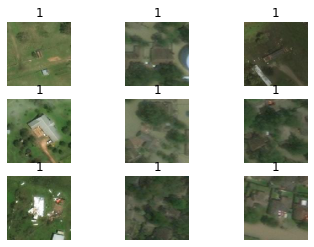

In [ ]:
import os
import numpy as np

from matplotlib import pyplot
from matplotlib.image import imread

import tensorflow
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.preprocessing.image import img_to_array

# Testing image directory
testing_image_directory = '/content/Pro-M3-Hurricane-Damage-Dataset/test/damage'

# All image files in the directory
img_files = os.listdir(testing_image_directory)    

i= 0

# Loop through an 9 image files
for file in img_files[51:60]:

  # full path of the image
  img_files_path = os.path.join(testing_image_directory, file)

  # load image 
  img_1 = load_img(img_files_path,target_size=(180, 180))

  # convert image to an array
  img_2 = img_to_array(img_1)

  # increase the dimension
  img_3 = np.expand_dims(img_2, axis=0)
  
  # predict the class of an unseen image
  prediction = model.predict(img_3)
  # print(prediction)

  predict_class = np.argmax(prediction, axis=1)
  # print(predict_class)

  # plot the image using subplot
  pyplot.subplot(3, 3, i+1)
  pyplot.imshow(img_2.astype('uint8'))
  
  # Add title of the plot as predicted class value
  pyplot.title(predict_class[0])

  # Do not show x and y axis with the image
  pyplot.axis('off')

  i=i+1

pyplot.show()